In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
df = pd.read_csv('/content/Dataset - Dataset.csv')
df.shape

(1000, 21)

In [4]:
df.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [5]:
df.tail()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad
999,0<=X<200,45,critical/other existing credit,used car,4576,100<=X<500,unemployed,3,male single,none,...,car,27,none,own,1,skilled,1,none,yes,good


In [10]:
# Are there any missing values
df.isna().sum()

over_draft                0
credit_usage              0
credit_history            0
purpose                   0
current_balance           0
Average_Credit_Balance    0
employment                0
location                  0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
cc_age                    0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [6]:
value_counts = df['class'].value_counts()
value_counts

good    700
bad     300
Name: class, dtype: int64

In [21]:
df['class'] = df['class'].replace(['good', 'bad'], [1, 0])
df

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,1
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,1
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,1
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,0


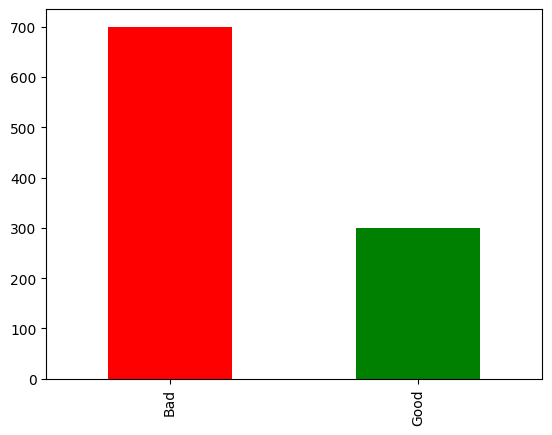

In [22]:

df['class'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.xticks(list(df['class'].value_counts().index), ['Good', 'Bad'])
plt.show()


In [23]:
# Checking Statistics
df.describe()

,credit_usage,current_balance,location,residence_since,cc_age,existing_credits,num_dependents,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [24]:
df.corr()

<ipython-input-24-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,credit_usage,current_balance,location,residence_since,cc_age,existing_credits,num_dependents,class
credit_usage,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,-0.214927
current_balance,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.154739
location,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.072404
residence_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.002967
cc_age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,0.091127
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,0.045732
num_dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.003015
class,-0.214927,-0.154739,-0.072404,-0.002967,0.091127,0.045732,0.003015,1.000000


<ipython-input-25-db792fffa780>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_map = df.corr()


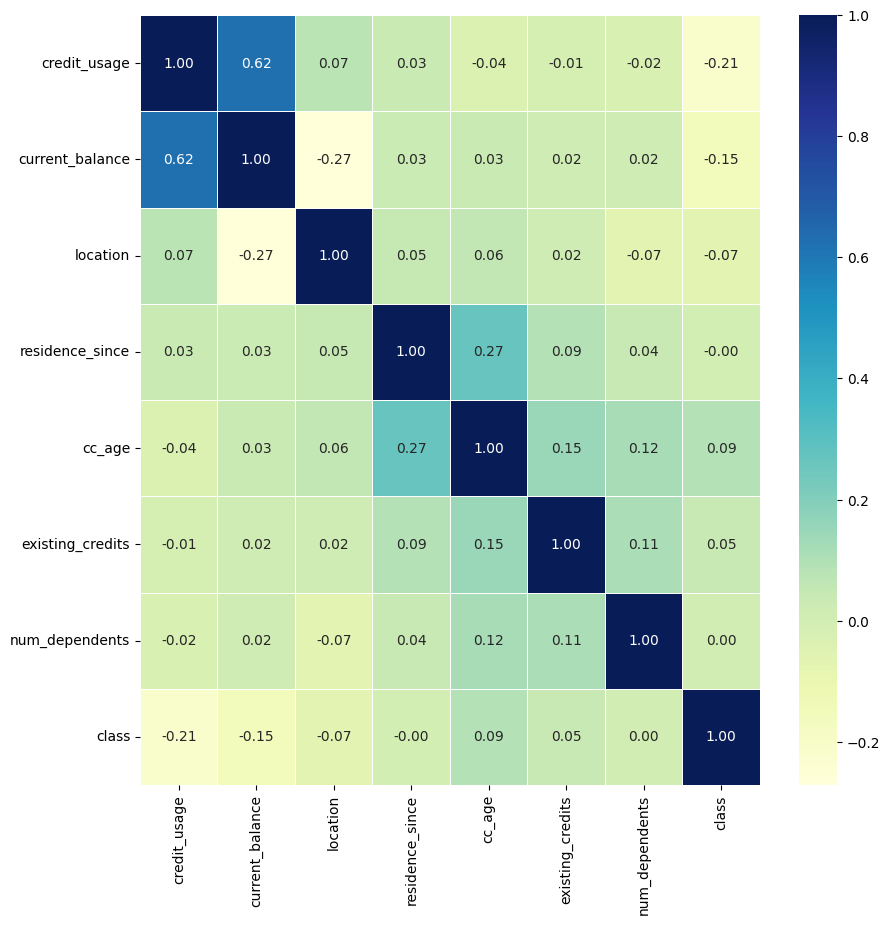

In [25]:
# Lets Draw Corelation Map
cor_map = df.corr()
home,room = plt.subplots(figsize=(10,10))
room = sns.heatmap(cor_map,
                  annot=True,
                  linewidths=0.5,
                  fmt='0.2f',
                  cmap='YlGnBu');

In [29]:
df = df.rename(columns={'class': 'classes'})
df

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,classes
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,1
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,1
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,1
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,0


In [33]:
value_counts = df['personal_status'].value_counts()
value_counts

male single           548
female div/dep/mar    310
male mar/wid           92
male div/sep           50
Name: personal_status, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

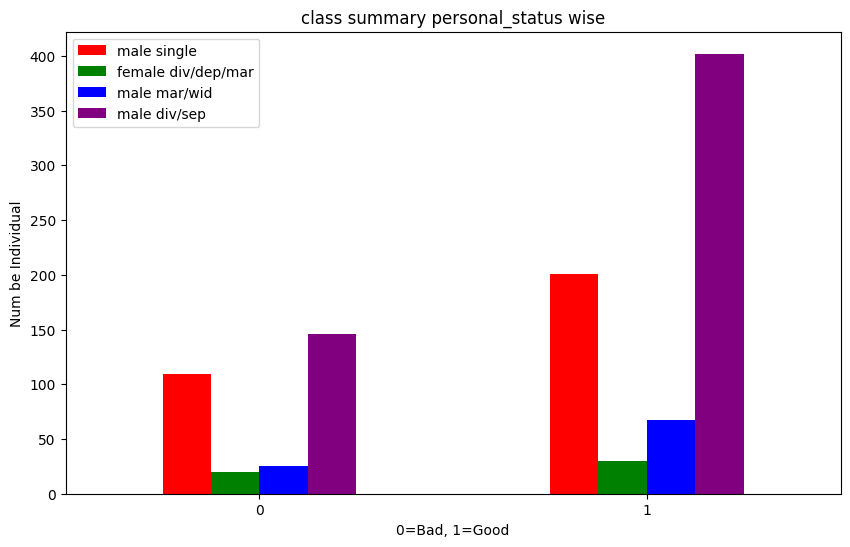

In [35]:
pd.crosstab(df.classes,df.personal_status).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red','green','blue','purple'])
plt.title('class summary personal_status wise')
plt.xlabel('0=Bad, 1=Good')
plt.ylabel('Num be Individual')
plt.legend(['male single','female div/dep/mar','male mar/wid','male div/sep '])
plt.xticks(rotation=0) #;

In [40]:
minimum_balance = df['current_balance'].min()
print("Minimum current balance:", minimum_balance)
maximum_balance = df['current_balance'].max()
print("Maximum current balance:", maximum_balance)


Minimum current balance: 250
Maximum current balance: 18424


Bin Counts:
(231.826, 3884.8]     738
(3884.8, 7519.6]      177
(7519.6, 11154.4]      57
(11154.4, 14789.2]     22
(14789.2, 18424.0]      6
Name: balance_bins, dtype: int64


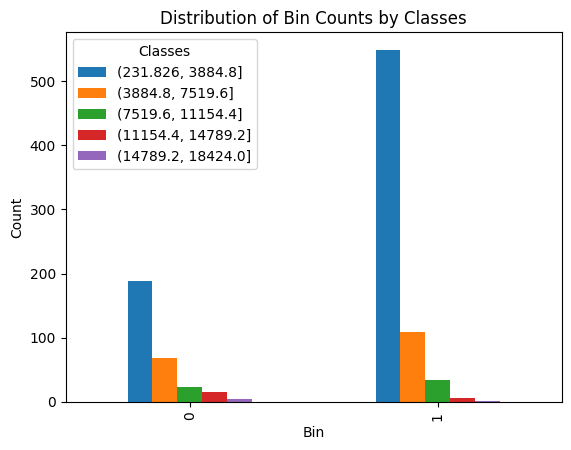

In [42]:
# Create current_balance bins
df['balance_bins'] = pd.cut(df['current_balance'], bins=5)

bin_counts = df['balance_bins'].value_counts().sort_index()

print("Bin Counts:")
print(bin_counts)

grouped_data = df.groupby('classes')['balance_bins'].value_counts().unstack().fillna(0)

grouped_data.plot(kind='bar')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('Distribution of Bin Counts by Classes')
plt.legend(title='Classes')
plt.show()


In [61]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder object
encoder = LabelEncoder()

# Transform each categorical column using LabelEncoder
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

# View the encoded data
print(df)


     over_draft  credit_usage  credit_history  purpose  current_balance  \
0             1             6               1        6             1169   
1             0            48               3        6             5951   
2             3            12               1        2             2096   
3             1            42               3        3             7882   
4             1            24               2        4             4870   
..          ...           ...             ...      ...              ...   
995           3            12               3        3             1736   
996           1            30               3        9             3857   
997           3            12               3        6              804   
998           1            45               3        6             1845   
999           0            45               1        9             4576   

     Average_Credit_Balance  employment  location  personal_status  \
0                         4  

In [69]:
# Drop the 'balance_bins' column
df = df.drop('balance_bins', axis=1)

# Print the updated DataFrame
print(df)


     over_draft  credit_usage  credit_history  purpose  current_balance  \
0             1             6               1        6             1169   
1             0            48               3        6             5951   
2             3            12               1        2             2096   
3             1            42               3        3             7882   
4             1            24               2        4             4870   
..          ...           ...             ...      ...              ...   
995           3            12               3        3             1736   
996           1            30               3        9             3857   
997           3            12               3        6              804   
998           1            45               3        6             1845   
999           0            45               1        9             4576   

     Average_Credit_Balance  employment  location  personal_status  \
0                         4  

In [70]:
# Split into test and train data
x = df.drop('classes', axis=1)
y = df['classes']

In [63]:
# see value of x
x

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,balance_bins,balance_bin_encoded
0,1,6,1,6,1169,4,3,4,3,2,...,67,1,1,2,1,1,1,1,"(231.826, 3884.8]",0
1,0,48,3,6,5951,2,0,2,0,2,...,22,1,1,1,1,1,0,1,"(3884.8, 7519.6]",1
2,3,12,1,2,2096,2,1,2,3,2,...,49,1,1,1,3,2,0,1,"(231.826, 3884.8]",0
3,1,42,3,3,7882,2,1,2,3,1,...,45,1,0,1,1,2,0,1,"(7519.6, 11154.4]",2
4,1,24,2,4,4870,2,0,3,3,2,...,53,1,0,2,1,2,0,1,"(3884.8, 7519.6]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,3,3,1736,2,1,3,0,2,...,31,1,1,1,3,1,0,1,"(231.826, 3884.8]",0
996,1,30,3,9,3857,2,0,4,1,2,...,40,1,1,1,0,1,1,1,"(231.826, 3884.8]",0
997,3,12,3,6,804,2,3,4,3,2,...,38,1,1,1,1,1,0,1,"(231.826, 3884.8]",0
998,1,45,3,6,1845,2,0,4,3,2,...,23,1,0,1,1,1,1,1,"(231.826, 3884.8]",0


In [64]:
# see value of y
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: classes, Length: 1000, dtype: int64

In [72]:
# using Random seed, so that others could produce the same result
np.random.seed(7)
# Split into test and train

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score



# Train the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
knn.fit(x_train, y_train)






KNeighborsClassifier()

In [ ]:

# Make predictions on the testing data
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [74]:
print(df.dtypes)


over_draft                int64
credit_usage              int64
credit_history            int64
purpose                   int64
current_balance           int64
Average_Credit_Balance    int64
employment                int64
location                  int64
personal_status           int64
other_parties             int64
residence_since           int64
property_magnitude        int64
cc_age                    int64
other_payment_plans       int64
housing                   int64
existing_credits          int64
job                       int64
num_dependents            int64
own_telephone             int64
foreign_worker            int64
classes                   int64
balance_bin_encoded       int64
dtype: object


In [80]:
# Train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
# Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
# Make predictions on the testing data
y_pred = random_forest.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


Random Forest Classifier give more accuracy than KNN